In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

MouseDrugData = pd.read_csv(mouse_drug_data)
MouseDrugDF = pd.DataFrame(MouseDrugData)
MouseDrugDF.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [2]:
ClinicalTrialData = pd.read_csv(clinical_trial_data)
ClinicalTrialDF = pd.DataFrame(ClinicalTrialData)
ClinicalTrialDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
MouseDrugDataMerge = pd.merge(MouseDrugDF,ClinicalTrialDF,on=["Mouse ID","Mouse ID"])
MouseDrugDataMerge.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [4]:
TumorResponseDF = MouseDrugDataMerge.groupby(["Drug","Timepoint"]).mean()
TumorResponseDF.drop(columns = "Metastatic Sites",inplace=True)
TumorResponseDF.reset_index(inplace=True)
TumorResponseDF.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
MetastaticDF = MouseDrugDataMerge.groupby(["Drug","Timepoint"]).mean()
MetastaticDF.drop(columns = "Tumor Volume (mm3)",inplace=True)
MetastaticDF.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [6]:
TumorResponseDF.sem(axis=0)

Timepoint             1.443376
Tumor Volume (mm3)    0.898067
dtype: float64

In [7]:
MouseDrugDataGroupby = MouseDrugDataMerge.groupby(["Drug","Timepoint"]).mean()
MouseDrugDataGroupby.reset_index(inplace=True)
MouseDrugDataMergePivot = MouseDrugDataGroupby.pivot("Timepoint","Drug","Tumor Volume (mm3)")
MouseDrugDataMergePivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


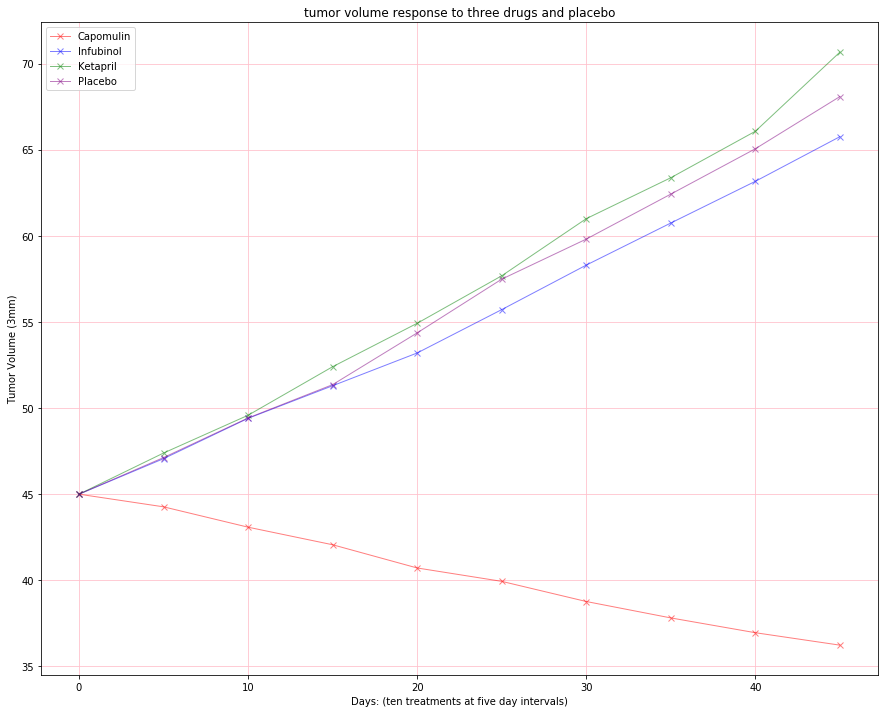

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(15,12))

x_axis = np.arange(0,50,5)
Capomulin = MouseDrugDataMergePivot["Capomulin"]
Infubinol = MouseDrugDataMergePivot["Infubinol"]
Ketapril = MouseDrugDataMergePivot["Ketapril"]
Placebo = MouseDrugDataMergePivot["Placebo"]

Capomulin, = plt.plot(x_axis, Capomulin, alpha=0.5, marker="x",color="red", linewidth=1, label="Capomulin")
Infubinol, = plt.plot(x_axis, Infubinol, color="blue", alpha=0.5, marker="x", linewidth=1, label="Infubinol")
Ketapril, = plt.plot(x_axis, Ketapril, color="green", alpha=0.5, marker="x", linewidth=1, label="Ketapril")
Placebo, = plt.plot(x_axis, Placebo, color="purple", alpha=0.5, marker="x", linewidth=1, label="Placebo") 

plt.grid(color='pink')
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc="best")
plt.title("tumor volume response to three drugs and placebo")
plt.xlabel("Days: (ten treatments at five day intervals)")
plt.ylabel("Tumor Volume (3mm)")

plt.show()

In [9]:
MetastaticDF = MouseDrugDataMerge.groupby(["Drug","Timepoint"]).mean()
MetastaticDF.reset_index(inplace=True)
MetastaticDFPivot = MetastaticDF.pivot("Timepoint","Drug","Metastatic Sites")
MetastaticDFPivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


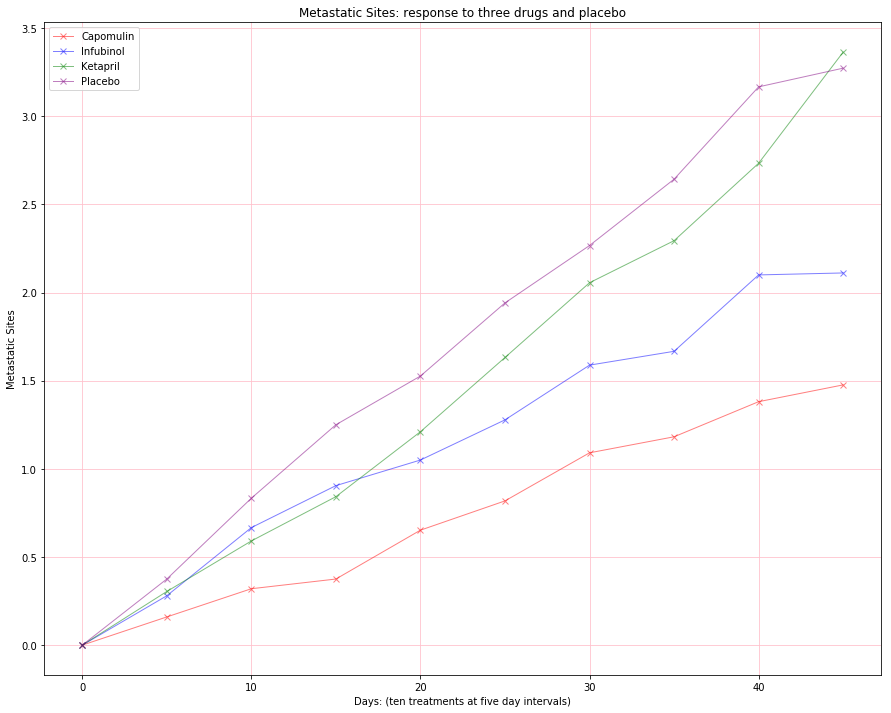

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(15,12))

x_axis = np.arange(0,50,5)
Capomulin = MetastaticDFPivot["Capomulin"]
Infubinol = MetastaticDFPivot["Infubinol"]
Ketapril = MetastaticDFPivot["Ketapril"]
Placebo = MetastaticDFPivot["Placebo"]

Capomulin, = plt.plot(x_axis, Capomulin, alpha=0.5, marker="x",color="red", linewidth=1, label="Capomulin")
Infubinol, = plt.plot(x_axis, Infubinol, color="blue", alpha=0.5, marker="x", linewidth=1, label="Infubinol")
Ketapril, = plt.plot(x_axis, Ketapril, color="green", alpha=0.5, marker="x", linewidth=1, label="Ketapril")
Placebo, = plt.plot(x_axis, Placebo, color="purple", alpha=0.5, marker="x", linewidth=1, label="Placebo") 

plt.grid(color='pink')
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc="best")
plt.title("Metastatic Sites: response to three drugs and placebo")
plt.xlabel("Days: (ten treatments at five day intervals)")
plt.ylabel("Metastatic Sites")

plt.show()

In [26]:
SurvivorMergeGroup = MouseDrugDataMerge.groupby(["Drug","Timepoint"]).count()

# Survivors = MouseDrugDataMergeGroup["Mouse ID"]/10
# Survivors
# MouseCounts = MouseDrugDataMerge["Mouse ID"].value_counts()
# MouseDrugDataMergePivot = MouseDrugDataMerge.pivot("Timepoint","Drug",MouseCounts)

SurvivorMergeGroup.reset_index(inplace=True)
SurvivorPivot = SurvivorMergeGroup.pivot("Timepoint","Drug","Mouse ID")
SurvivorPivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


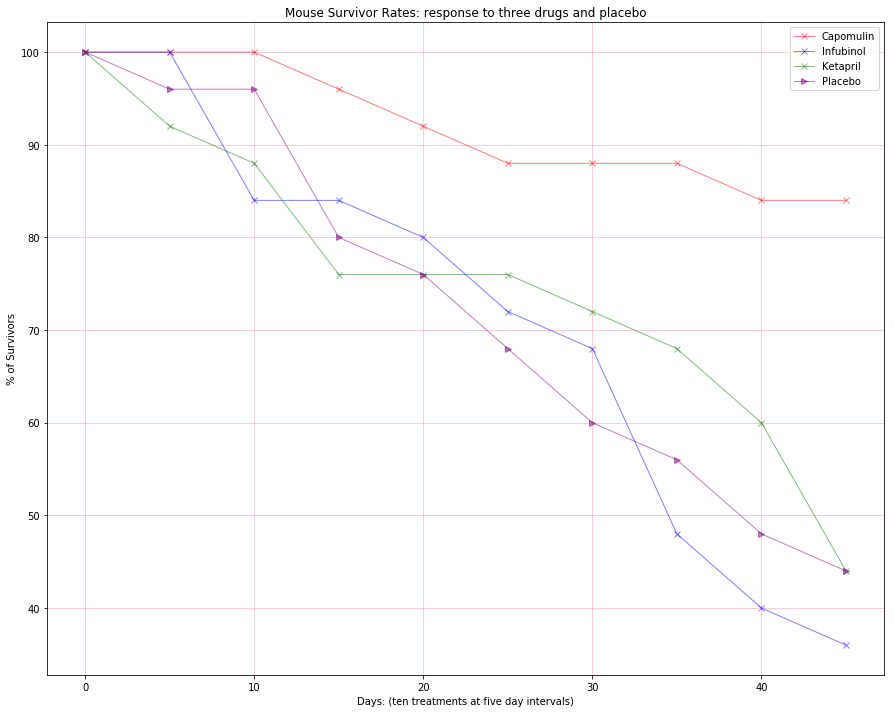

In [25]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(15,12))

x_axis = np.arange(0,50,5)
Capomulin = SurvivorPivot["Capomulin"]*4
Infubinol = SurvivorPivot["Infubinol"]*4
Ketapril = SurvivorPivot["Ketapril"]*4
Placebo = SurvivorPivot["Placebo"]*4

Capomulin, = plt.plot(x_axis, Capomulin, alpha=0.5, marker="x",color="red", linewidth=1, label="Capomulin")
Infubinol, = plt.plot(x_axis, Infubinol, color="blue", alpha=0.5, marker="x", linewidth=1, label="Infubinol")
Ketapril, = plt.plot(x_axis, Ketapril, color="green", alpha=0.5, marker="x", linewidth=1, label="Ketapril")
Placebo, = plt.plot(x_axis, Placebo, color="purple", alpha=0.5, marker=">", linewidth=1, label="Placebo") 

plt.grid(color='pink')
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc="best")
plt.title("Mouse Survivor Rates: response to three drugs and placebo")
plt.xlabel("Days: (ten treatments at five day intervals)")
plt.ylabel("% of Survivors")

plt.show()